In [1]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker

import scienceplots
plt.style.use('science')

plt.rcParams.update({'font.size': 11})

ModuleNotFoundError: No module named 'mesa_reader'

In [ ]:
h = mr.MesaData("1Msol/LOGS/history.data")

In [ ]:
import pandas as pd
df = pd.DataFrame({col: h.data(f"{col}") for col in h.bulk_names})


In [ ]:
from scipy.interpolate import interp1d

age_to_model = interp1d(h.star_age, h.model_number, bounds_error=False, fill_value="extrapolate")

def plot_age_lines(ax, ages, with_label=True):

    for age in ages:
        model_number = age_to_model(age)
        ax.axvline(model_number, color='tab:orange', linestyle='--', linewidth=.7, alpha=0.7)

        if age >= 1e9:
            label = f"{age/1e9:.2f} Gyr"
        elif age >= 1e6:
            label = f"{age/1e6:.1f} Myr"
        elif age >= 1e3:
            label = f"{age/1e3:.0f} kyr"
        else:
            label = f"{age:.0f} yr"

        if with_label:
            ax.annotate(
                label,
                xy=(model_number, ax.get_ylim()[1]),
                xytext=(0, 1),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=5,
                color='tab:orange',
                rotation=45,
                clip_on=False
            )

ages = [1e2,2.5e7, 4.6e9, 1e10]  

In [ ]:
def plot_with_log_age_top_axis(x_model, y_data, star_age, 
                                xlabel="Model Number", 
                                ylabel=r"$\log_{10}(\Delta t)$", 
                                log_age_label=r"$\log_{10}(\mathrm{Age/Myr})$",
                                fig_kwargs={"dpi": 300, "figsize": (3, 3), "tight_layout": True},
                                n_ticks=8):

    fig, ax1 = plt.subplots(**fig_kwargs)

    # Main plot
    ax1.plot(x_model, y_data, label=ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_xlim(x_model[0], x_model[-1])
    # Twin top axis with log10(age)
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())

    # Tick positions and labels
    tick_locs = np.linspace(x_model[0], x_model[-1], n_ticks)
    tick_labels = []
    for t in tick_locs:
        idx = np.searchsorted(x_model, int(t))
        idx = np.clip(idx, 0, len(star_age) - 1)
        log_age = np.log10(star_age[idx])
        tick_labels.append(f"{log_age:.1f}")

    ax2.set_xticks(tick_locs)
    ax2.set_xticklabels(tick_labels, fontsize=8)
    ax2.set_xlabel(log_age_label)

    # Use logarithmic spacing on the top ticks
    ax2.xaxis.set_major_locator(ticker.FixedLocator(tick_locs))
    ax2.tick_params(axis='x', direction='in', top=True)

    return fig, ax1, ax2

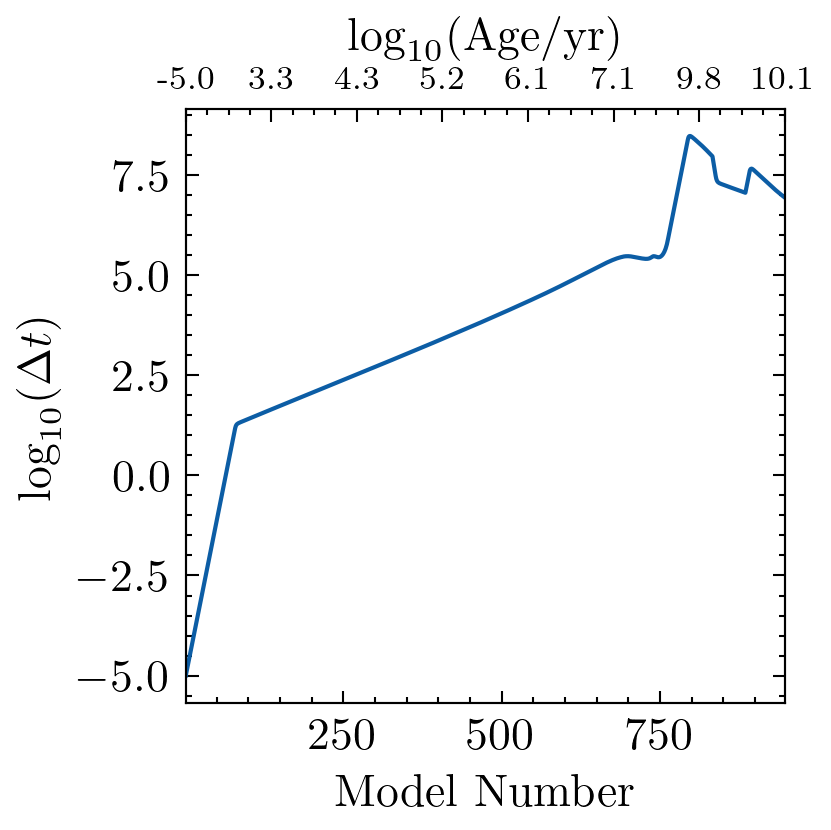

In [ ]:
fig, ax1, ax2 = plot_with_log_age_top_axis(h.model_number, h.log_dt, h.star_age,
                           ylabel=r"$\log_{10}(\Delta t)$",
                           log_age_label=r"$\log_{10}(\mathrm{Age/yr})$")


fig.savefig("../lab_report/plots/log_dt_vs_model_number.pdf", dpi=300, bbox_inches='tight')

# Profile

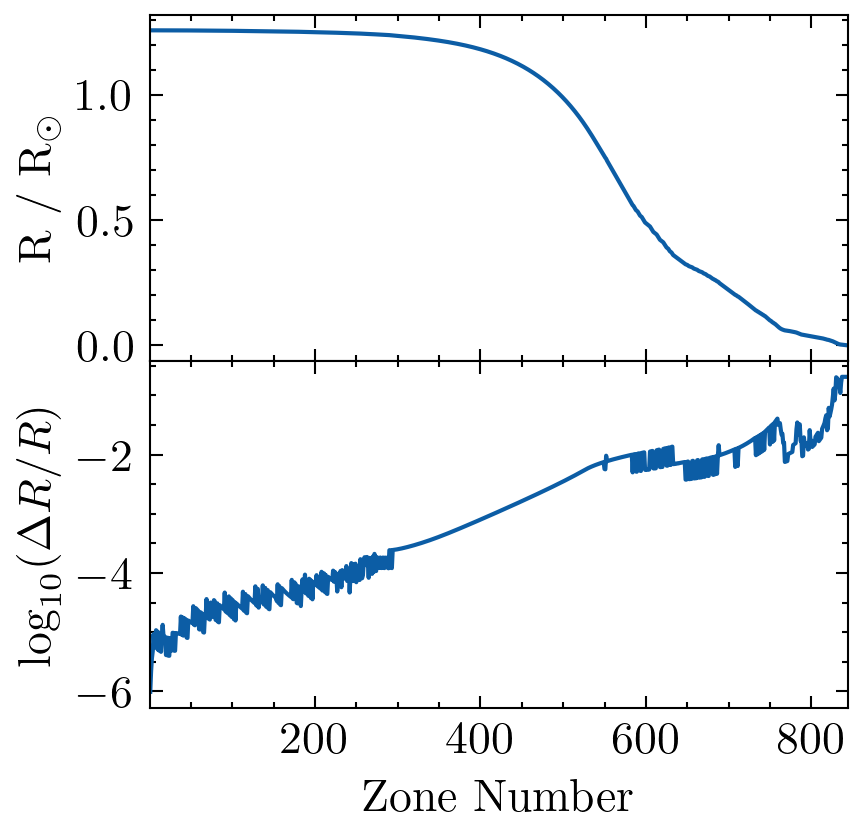

In [ ]:
l = mr.MesaLogDir("1Msol/LOGS/")

data = l.profile_data(profile_number=20)

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, dpi=300, figsize=(3, 3), sharex=True)

ax1.plot(data.zone, 10**data.logR)
ax1.set_ylabel(r"R / R$_\odot$")



R = 10**data.logR
Rrel = np.abs(np.diff(R) / R[:-1])
ax2.plot(data.zone[:-1], np.log10(Rrel))

ax2.set_xlabel("Zone Number")
ax2.set_xlim(data.zone[0], data.zone[-1])
ax2.set_ylabel(r"$\log_{10}(\Delta R/R)$")


fig.subplots_adjust(wspace=0, hspace=0)

fig.savefig("../lab_report/plots/R_vs_zone.pdf", dpi=300, bbox_inches='tight')

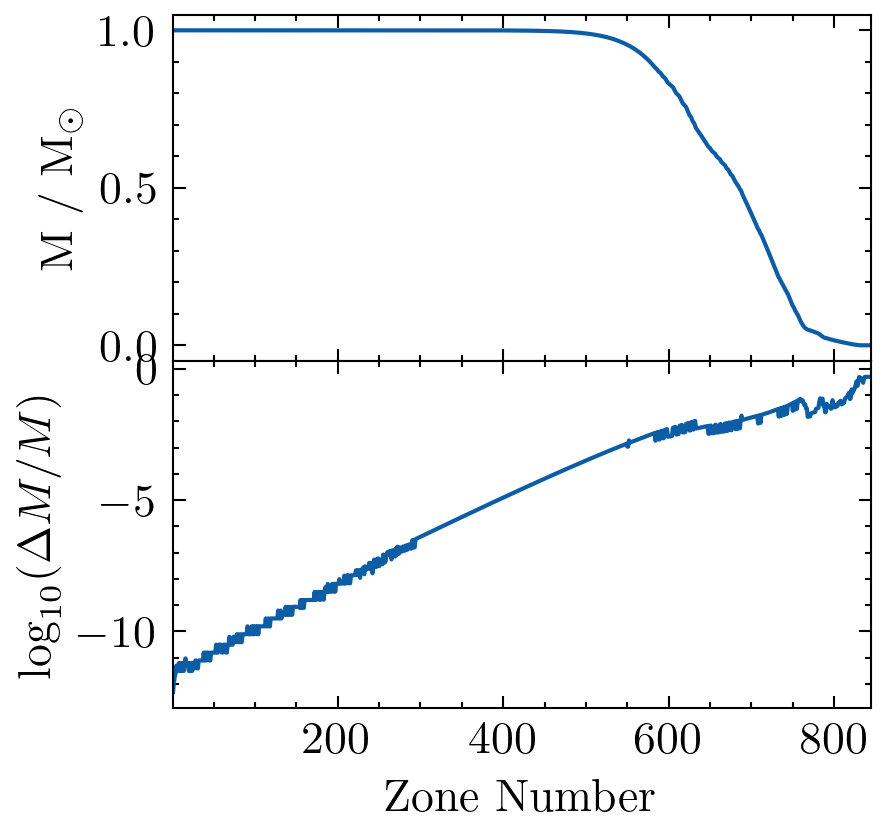

In [ ]:
l = mr.MesaLogDir("1Msol/LOGS/")

data = l.profile_data(profile_number=20)

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, dpi=300, figsize=(3, 3), sharex=True)

M = data.mass

ax1.plot(data.zone, M)
ax1.set_ylabel(r"M / M$_\odot$")


Mrel = np.abs(np.diff(M) / M[:-1])
ax2.plot(data.zone[:-1], np.log10(Mrel))

ax2.set_xlabel("Zone Number")
ax2.set_xlim(data.zone[0], data.zone[-1])
ax2.set_ylabel(r"$\log_{10}(\Delta M/M)$")


fig.subplots_adjust(wspace=0, hspace=0)


# Q.1.4

In [ ]:
L = 10**h.log_L

Lnuc = 10**h.log_Lnuc

h.star_age[Lnuc / L > 0.99][0] / 1e7

np.float64(3.8553060544127518)

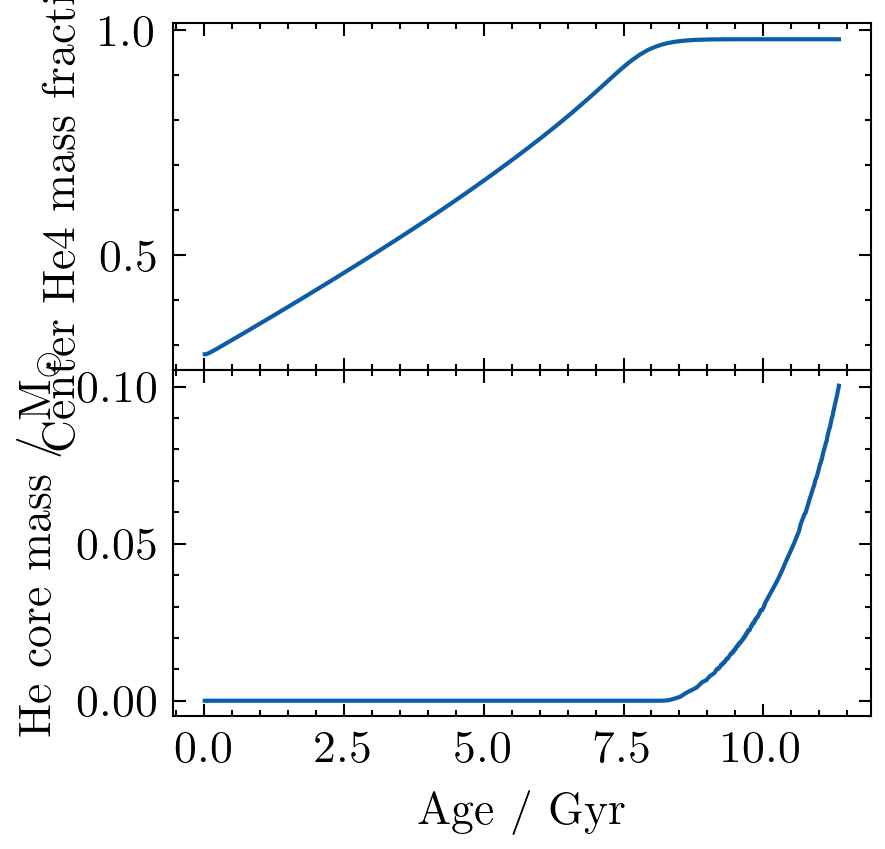

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=300, figsize=(3, 3), sharex=True)

mask = h.star_age > 1e7
h_star_age = h.star_age[mask] / 1e9 # convert to Myr

h_he_core_mass = h.he_core_mass[mask]
h_center_he4 = h.center_he4[mask]

ax1.plot(h_star_age, h_center_he4, label=r"$M_\mathrm{He, core}$")
ax1.set_ylabel(r"Central")
ax1.set_ylabel(r"Center He4 mass fraction")

ax2.plot(h_star_age, h_he_core_mass, label=r"$M_\mathrm{He, core}$")
# ax2.set_yscale('log')
ax2.set_xlabel(r"Age / Gyr")
ax2.set_ylabel(r"He core mass / M$_\odot$")


fig.subplots_adjust(wspace=0, hspace=0)

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=300, figsize=(3, 3), sharex=True)

ax1.plot(h.star_age, h.log_LH, label=r"$M_\mathrm{He, core}$")
ax1.set_ylabel(r"Central")
ax1.set_ylabel(r"Center He4 mass fraction")

ax2.plot(h_star_age, h.log_LHE, label=r"$M_\mathrm{He, core}$")
# ax2.set_yscale('log')
ax2.set_xlabel(r"Age / Gyr")
ax2.set_ylabel(r"He core mass / M$_\odot$")


fig.subplots_adjust(wspace=0, hspace=0)

NameError: name 'plt' is not defined

In [ ]:
# Calculate R/R_dot

In [ ]:
R = 10**h.log_R #in Rsun

R_dot = np.diff(R)

data_y = np.abs(R_dot / R[:-1])

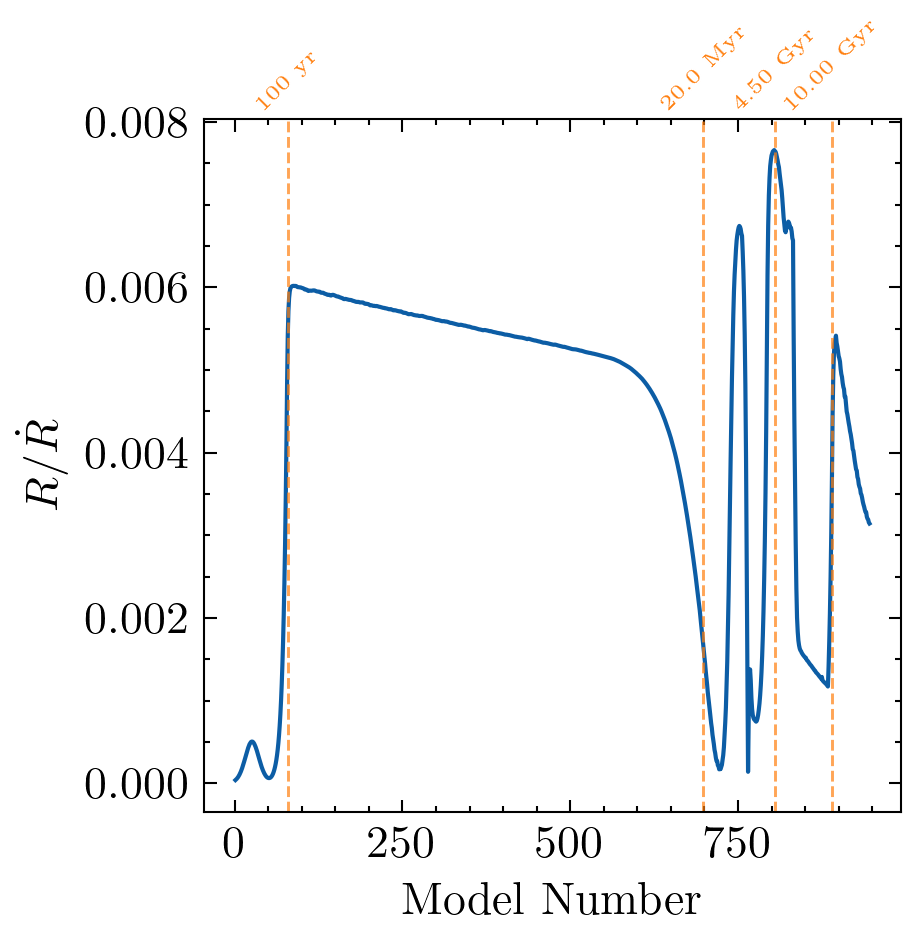

In [ ]:
fig, ax = plt.subplots(dpi=300, figsize=(3, 3))

ax.plot(h.model_number[:-1], data_y)
ax.set_ylabel(r"$R / \dot{R}$")
ax.set_xlabel(r"Model Number")

# Specify ages (in years) — can be Gyr, Myr, whatever
ages = [1e2, 2.0e7, 4.5e9, 1e10]  # Extend this as needed

plot_age_lines(ax, ages)

In [49]:
G_dyn = 3.9413556368747037e-7 # R⊙^3 M⊙^-1 s^-2
M = 1 # 1Msu

t_dyn = np.sqrt(R**3 / G_dyn * M)
L = 10**h.log_L

G_KH = 1.5699638381112361e7 # L⊙ R⊙ yr M⊙^-2
t_KH = G_KH / (R * L)

t_nuc = 10e10 / L #yr

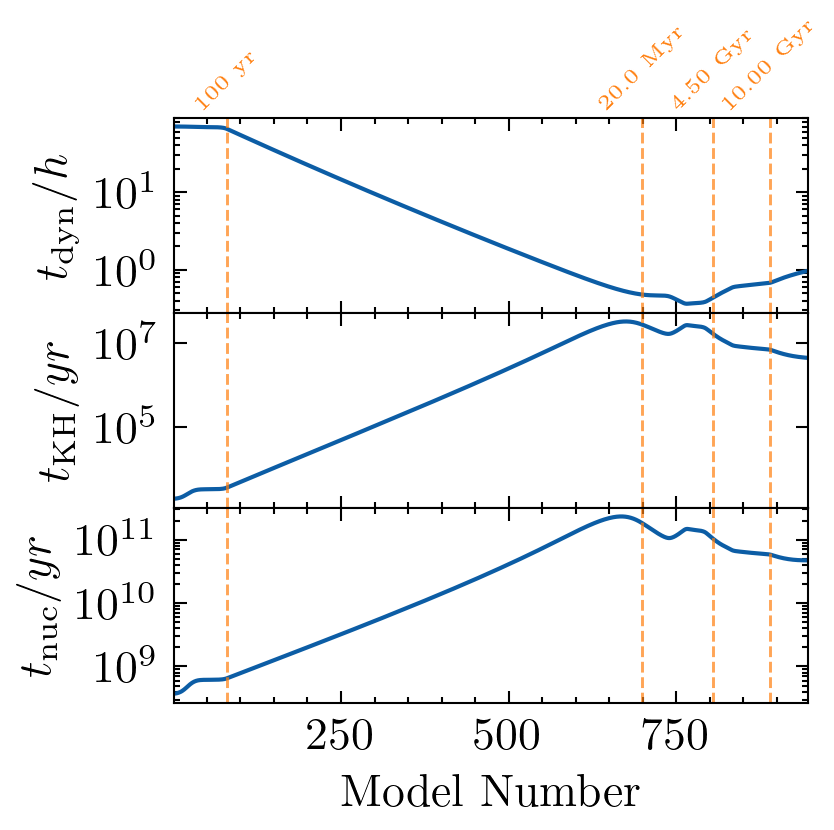

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=300, figsize=(3, 3), sharex=True)

ax1, ax2, ax3 = axes

# Plot examples (replace with your data)
ax1.plot(h.model_number, t_dyn / 3600)  # hours
ax1.set_ylabel(r"$t_\text{dyn} / h$")
ax1.set_yscale('log')

ax2.plot(h.model_number, t_KH)  # Kelvin-Helmholtz time
ax2.set_ylabel(r"$t_\text{KH} / yr$")
ax2.set_yscale('log')

ax3.plot(h.model_number, t_nuc)  # Example: nuclear timescale
ax3.set_ylabel(r"$t_\text{nuc} / yr$")
ax3.set_xlabel(r"Model Number")
ax3.set_yscale('log')
ax3.set_xlim(h.model_number[0], h.model_number[-1])

for ax in [ax1, ax2, ax3]:
    if ax is ax1:
        with_label=True
    else: 
        with_label=False
    plot_age_lines(ax, ages, with_label=with_label)

# Final layout
fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)


Masked

In [99]:
mask = (h.model_number > 500)

R = 10**h.log_R[mask] #in Rsun
L = 10**h.log_L[mask]

G_dyn = 3.9413556368747037e-7 # R⊙^3 M⊙^-1 s^-2
M = 1 # 1Msu

t_dyn = np.sqrt(R**3 / G_dyn * M)

G_KH = 1.5699638381112361e7 # L⊙ R⊙ yr M⊙^-2
t_KH = G_KH / (R * L)

t_nuc = 10e10 / L #yr

In [100]:
model_to_age = interp1d(h.model_number, h.star_age, bounds_error=False, fill_value="extrapolate")

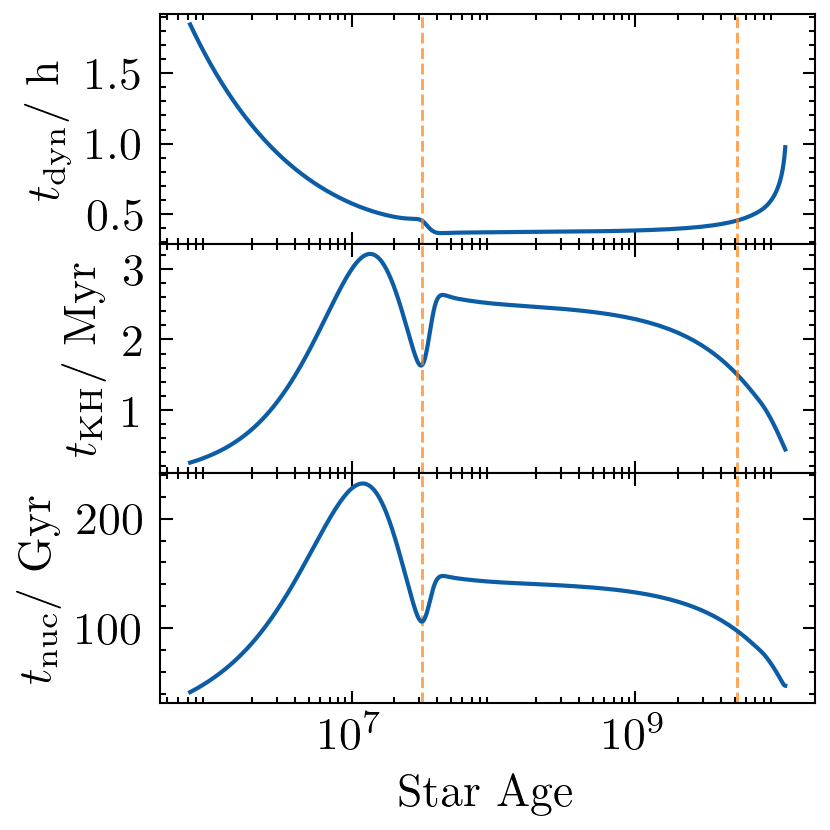

In [126]:

fig, axes = plt.subplots(nrows=3, ncols=1, dpi=300, figsize=(3, 3), sharex=True)

ax1, ax2, ax3 = axes

data_x = h.star_age[mask]

# Plot examples (replace with your data)
ax1.plot(data_x, t_dyn / 3600)  # hours
ax1.set_ylabel(r"$t_\text{dyn} /$ h")
ax1.set_xscale('log')

ax2.plot(data_x, t_KH / 1e7)  # Kelvin-Helmholtz time
ax2.set_ylabel(r"$t_\text{KH} /$ Myr")
ax2.set_xscale('log')

for ax in [ax1, ax2, ax3]:
    ax.axvline(model_to_age(739), color='tab:orange', linestyle='--', linewidth=.7, alpha=0.7)
    ax.axvline(model_to_age(808), color='tab:orange', linestyle='--', linewidth=.7, alpha=0.7)

ax3.plot(data_x, t_nuc / 1e9) 
ax3.set_ylabel(r"$t_\text{nuc} /$ Gyr")
ax3.set_xlabel(r"Star Age")
ax3.set_xscale('log')
ax3.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

# Final layout
fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)